# Game of Thrones Rulers Visualization

This notebook explores the **rulers of Westeros** from the Game of Thrones universe. 
We analyze reign lengths, houses, gender distribution, and major historical events using **Python, Pandas, Matplotlib, Seaborn, Plotly, and Altair**.

The goal is to create clear visualizations and an **interactive timeline** of rulers.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('default')  


sns.set(style="whitegrid")
%matplotlib inline


In [21]:
data = pd.read_csv("/kaggle/input/gotdataset/GoTDataset.csv")  
data['ReignLength'] = pd.to_numeric(data['ReignLength'], errors='coerce')  
data.head()


,Ruler,House,Years,StartYear,EndYear,ReignLength,Gender,Predecessor,Successor,MajorEvents,ColorCode,Ongoing,ImagePath
0,Aegon I,Targaryen,1-37 AC,1,37.0,36.0,Male,NaN,Aenys I,Conquest of Westeros,#ff0000,No,/kaggle/input/gotimages/images/Aegon_I.png
1,Aenys I,Targaryen,37-42 AC,37,42.0,5.0,Male,Aegon I,Maegor I,Early Rebellions,#ff6666,No,/kaggle/input/gotimages/images/Aenys_I.png
2,Maegor I,Targaryen,42-48 AC,42,48.0,6.0,Male,Aenys I,Jaehaerys I,Tyranny and construction of Red Keep,#ff3333,No,/kaggle/input/gotimages/images/MAEGOR_I.png
3,Jaehaerys I,Targaryen,48-103 AC,48,103.0,55.0,Male,Maegor I,Viserys I,Long Peace and legal reforms,#ff9999,No,/kaggle/input/gotimages/images/JAEHAERYS_I.png
4,Viserys I,Targaryen,103-129 AC,103,129.0,26.0,Male,Jaehaerys I,Aegon II,Succession crisis,#ffcccc,No,/kaggle/input/gotimages/images/VISERYS_I.png


## Dataset Overview

The dataset contains information about GoT rulers including:

- `Ruler`: Name of the ruler
- `House`: House or dynasty they belong to
- `Years`: The official years of reign
- `StartYear` & `EndYear`: Numeric values for timeline visualization
- `ReignLength`: Duration of their reign in years
- `Gender`: Male or Female
- `Predecessor` & `Successor`: Previous and next rulers
- `MajorEvents`: Key events during their rule
- `ColorCode`: Hex color associated with the ruler for visualization
- `Ongoing`: If the ruler is still in power


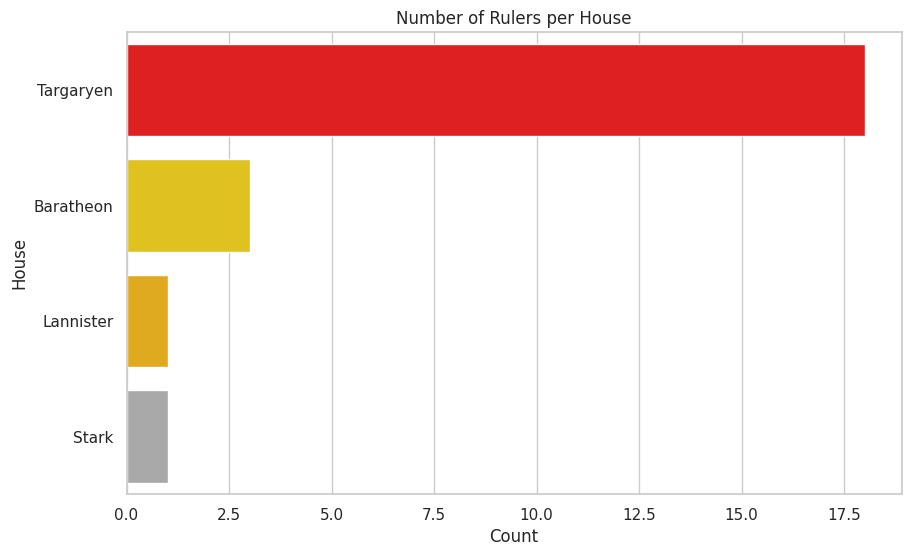

In [22]:
house_colors = data.groupby('House')['ColorCode'].first().to_dict()

house_colors['Targaryen'] = '#FF0000'  
house_colors['Baratheon'] = '#FFD700'  
house_colors['Lannister'] = '#FFB800'  
house_colors['Stark'] = '#A9A9A9'      

plt.figure(figsize=(10,6))
sns.countplot(
    data=data,
    y='House',
    order=data['House'].value_counts().index,
    palette=house_colors
)
plt.title("Number of Rulers per House")
plt.xlabel("Count")
plt.ylabel("House")
plt.show()


## Number of Rulers per House

This bar plot shows how many rulers each House has produced. 
It helps identify which houses dominated Westeros over time.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


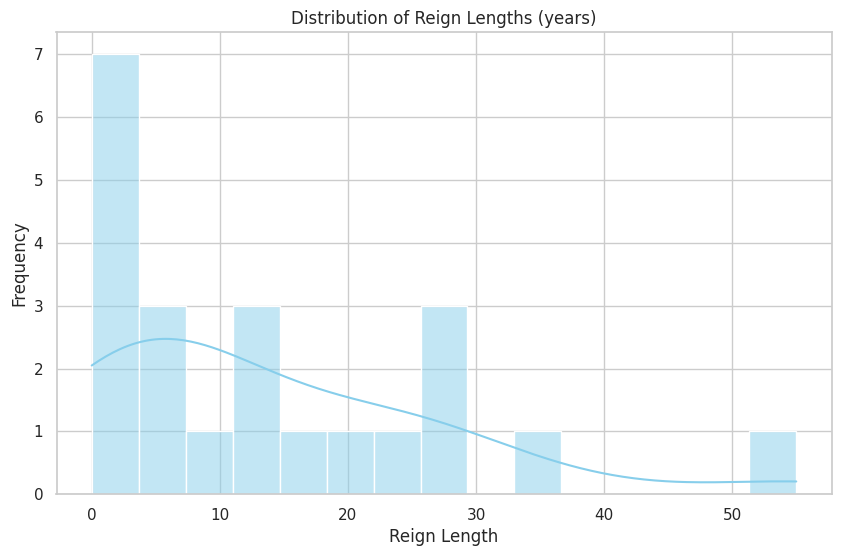

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data['ReignLength'].dropna(), bins=15, kde=True, color='skyblue')
plt.title("Distribution of Reign Lengths (years)")
plt.xlabel("Reign Length")
plt.ylabel("Frequency")
plt.show()


## Distribution of Reign Lengths

This histogram shows the distribution of rulers' reign lengths.
We can see which rulers had short, medium, or long reigns.


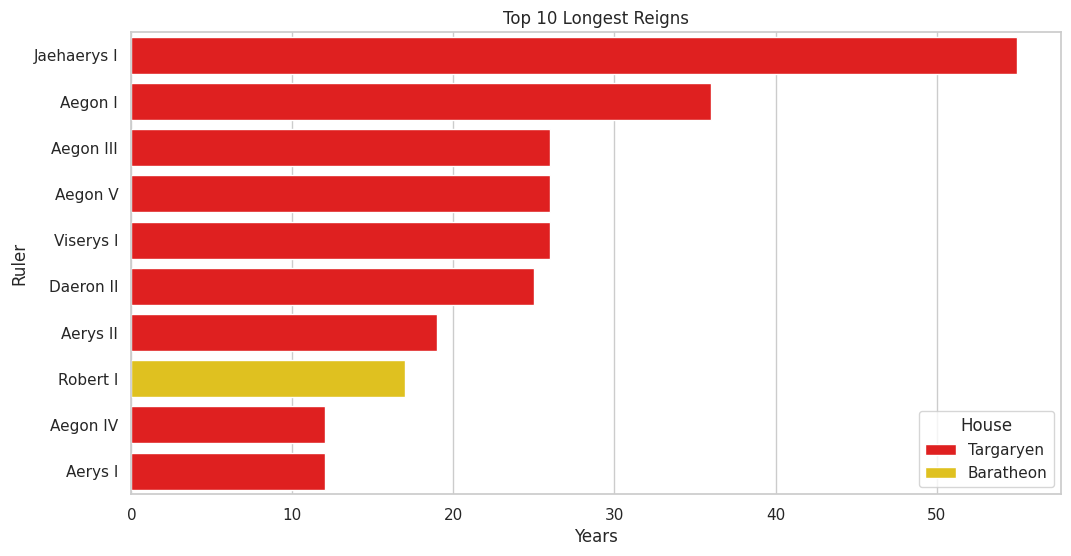

In [24]:
house_colors = data.groupby('House')['ColorCode'].first().to_dict()

house_colors['Baratheon'] = '#FFD700'  

longest_reigns = data[['Ruler','House','ReignLength']].sort_values(by='ReignLength', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=longest_reigns,
    x='ReignLength',
    y='Ruler',
    hue='House',
    dodge=False,
    palette=house_colors  
)
plt.title("Top 10 Longest Reigns")
plt.xlabel("Years")
plt.ylabel("Ruler")
plt.legend(title='House')
plt.show()


## Top 10 Longest Reigns

The following bar chart highlights the rulers with the longest reigns in Westeros.
It provides insights into stability and influential rulers.


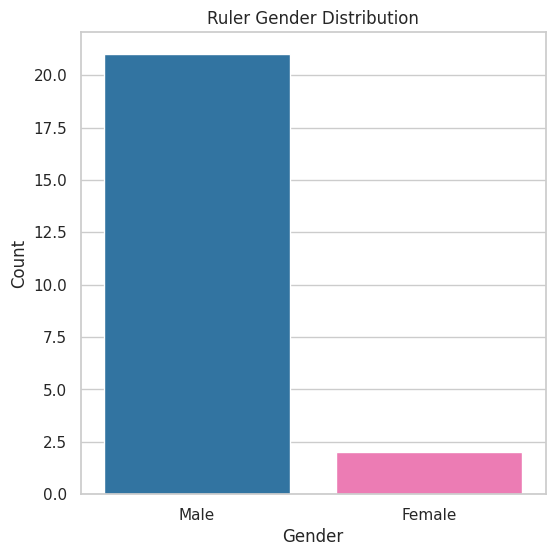

In [25]:
gender_colors = {
    'Male': '#1f77b4',    
    'Female': '#ff69b4'   
}

plt.figure(figsize=(6,6))
sns.countplot(
    data=data,
    x='Gender',
    palette=gender_colors
)
plt.title("Ruler Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


## Gender Distribution of Rulers

This plot shows the number of male vs female rulers in the dataset.
It highlights the gender imbalance among Westeros rulers.


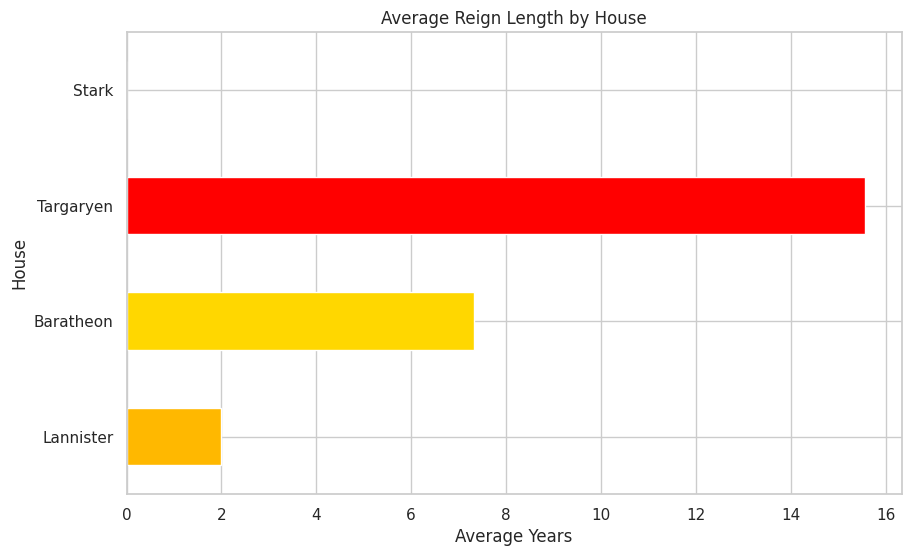

In [26]:
house_colors = data.groupby('House')['ColorCode'].first().to_dict()

house_colors['Targaryen'] = '#FF0000'  
house_colors['Baratheon'] = '#FFD700'  
house_colors['Lannister'] = '#FFB800'  
house_colors['Stark'] = '#A9A9A9'      

avg_reign = data.groupby('House')['ReignLength'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_reign.plot(
    kind='barh',
    color=[house_colors.get(h, '#808080') for h in avg_reign.index]  
)
plt.title("Average Reign Length by House")
plt.xlabel("Average Years")
plt.ylabel("House")
plt.show()


## Average Reign Length by House

This horizontal bar chart shows the average number of years each house ruled.
It gives an idea of which houses maintained power longer.


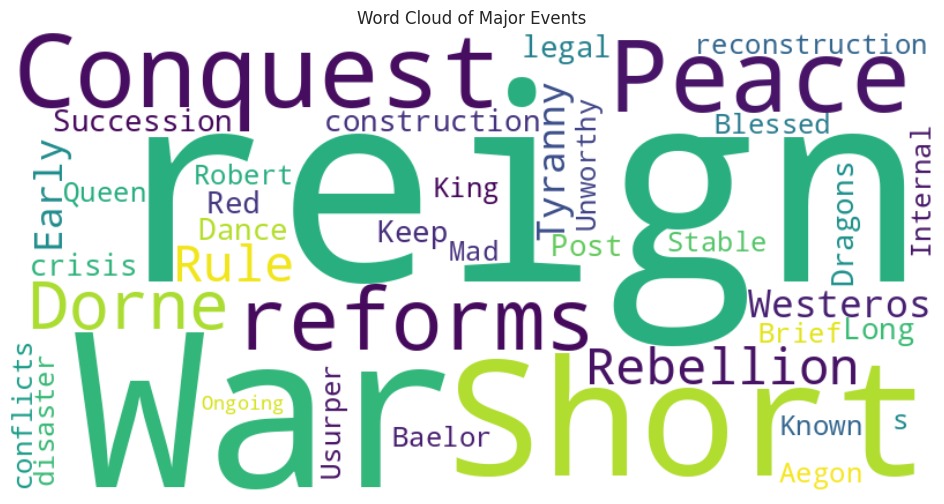

In [27]:
from wordcloud import WordCloud

text = " ".join(event for event in data['MajorEvents'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Major Events")
plt.show()


## Word Cloud of Major Events

This word cloud summarizes key historical events across Westeros.
The size of each word indicates how frequently it appeared in the dataset.


In [28]:
import altair as alt

data['StartYear_num'] = pd.to_numeric(data['StartYear'], errors='coerce')
data['EndYear_num'] = pd.to_numeric(data['EndYear'], errors='coerce')

max_year = data['EndYear_num'].max()
data['EndYear_plot'] = data.apply(lambda row: row['EndYear_num'] if pd.notna(row['EndYear_num']) else max_year+5, axis=1)

house_colors = {
    'Targaryen': '#FF0000',  
    'Baratheon': '#FFD700',  
    'Lannister': '#FFB800',  
    'Stark': '#A9A9A9'       
}
for h in data['House'].unique():
    if h not in house_colors:
        house_colors[h] = data.loc[data['House']==h, 'ColorCode'].iloc[0]

timeline_chart = alt.Chart(data).mark_bar(size=20).encode(
    x=alt.X('StartYear_num:Q', title='Year AC'),
    x2='EndYear_plot:Q',
    y=alt.Y('Ruler:N', sort=alt.SortField('StartYear_num', order='ascending')),
    color=alt.Color('House:N', scale=alt.Scale(domain=list(house_colors.keys()), range=list(house_colors.values()))),
    tooltip=['Ruler', 'House', 'ReignLength', 'MajorEvents', 'Gender']
).properties(
    width=900,
    height=800,
    title='Interactive GoT Rulers Timeline'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

timeline_chart


alt.Chart(...)

## Interactive Timeline of Rulers

This interactive Altair chart allows you to:

- Hover over rulers to see their house, major events, reign length, and gender
- Zoom and pan across the timeline
- Visualize ongoing rulers and overlapping reigns


## Conclusions & Insights

After exploring the Game of Thrones rulers dataset, we can summarize the following insights:

1. **House Dominance**  
   - The Targaryens had the most rulers and some of the longest reigns, showing their historical dominance.  
   - Other houses like Baratheon and Lannister had shorter dynasties in comparison.

2. **Reign Length Patterns**  
   - Long reigns often indicate periods of stability (e.g., Jaehaerys I, 55 years).  
   - Short reigns or abrupt transitions often correspond to **conflict, rebellion, or succession crises** (e.g., Aegon II, Tommen I).  

3. **Gender Imbalance**  
   - The majority of rulers are male, with very few female rulers, reflecting the historical patriarchal system of Westeros.  

4. **Major Events Trends**  
   - Major wars, rebellions, and crises are concentrated around shorter reigns.  
   - Periods with fewer major events generally correspond to longer, stable reigns.

5. **Interactive Timeline Utility**  
   - The Altair timeline allows easy exploration of rulers and their reigns.  
   - Hovering over rulers provides quick insights into their house, events, and reign length.  
   - Ongoing rulers are clearly represented to highlight the current timeline.

This project demonstrates **data cleaning, visualization, and interactive plotting skills** using Python libraries like Pandas, Matplotlib, Seaborn and Altair.
